In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings('ignore')

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [7]:


# Read the dataset from zip file or CSV, with error handling
zip_path = 'data/spotify_most_streamed_2024.zip'
csv_path = 'data/spotify_most_streamed_2024.csv'

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        csv_file = zip_ref.namelist()[0]  # Get the first (and likely only) CSV file
        with zip_ref.open(csv_file) as file:
            df = pd.read_csv(file, encoding='unicode_escape')
elif os.path.exists(csv_path):
    try:
        df = pd.read_csv(csv_path, encoding='unicode_escape')
    except Exception:
        df = pd.read_csv(csv_path, encoding='utf-8')
else:
    print("Warning: Neither the zip file nor the CSV file was found in the 'data/' directory.")
    df = None  # Set df to None so subsequent code can check if data was loaded

print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (4600, 29)

Column names:
['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC', 'All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity', 'Explicit Track']

First few rows:


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [8]:

# Ensure all data has been read correctly; check the data types. 
# Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). 
# To do so, try to use `apply()` instead of a manual mapping between old and new name. 
# Get rid of any unnecessary ones.

# Step 1: Check current state of the data
print("=== STEP 1: Current Data Overview ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of columns: {len(df.columns)}")
print("\nCurrent column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Step 2: Check data types
print("\n=== STEP 2: Data Types ===")
print(df.dtypes)

# Step 3: Get detailed info about the dataset
print("\n=== STEP 3: Dataset Info ===")
df.info()

# Step 4: Check for missing values
print("\n=== STEP 4: Missing Values ===")
missing_values = df.isnull().sum()
print("Columns with missing values:")
for col, missing_count in missing_values[missing_values > 0].items():
    percentage = (missing_count / len(df)) * 100
    print(f"{col}: {missing_count} ({percentage:.1f}%)")

# Step 5: Look at first few rows to understand the data better
print("\n=== STEP 5: Sample Data ===")
print("First 3 rows:")
print(df.head(3))

# Step 6: Define function to clean column names using apply()
def clean_column_name(col_name):
    """
    Function to clean and standardize column names
    Converts to snake_case and makes names more descriptive
    """
    # Convert to lowercase and replace spaces/special characters
    cleaned = col_name.lower()
    cleaned = cleaned.replace(' ', '_')
    cleaned = cleaned.replace('-', '_')
    cleaned = cleaned.replace('(', '').replace(')', '')
    cleaned = cleaned.replace('%', 'percent')
    cleaned = cleaned.replace('#', 'number')
    
    # Handle specific column name improvements
    if 'all_time_rank' in cleaned or 'all time rank' in cleaned:
        return 'all_time_rank'
    elif 'track_score' in cleaned or 'track score' in cleaned:
        return 'track_score'
    elif cleaned == 'track':
        return 'track_name'
    elif cleaned == 'artist':
        return 'artist_name'
    elif 'spotify_streams' in cleaned:
        return 'spotify_streams'
    elif 'spotify_playlist_count' in cleaned or 'spotify playlists' in cleaned:
        return 'spotify_playlist_count'
    elif 'spotify_playlist_reach' in cleaned:
        return 'spotify_playlist_reach'
    elif 'youtube_views' in cleaned:
        return 'youtube_views'
    elif 'youtube_likes' in cleaned:
        return 'youtube_likes'
    elif 'tiktok_posts' in cleaned:
        return 'tiktok_posts'
    elif 'tiktok_likes' in cleaned:
        return 'tiktok_likes'
    elif 'tiktok_views' in cleaned:
        return 'tiktok_views'
    elif 'apple_playlist' in cleaned:
        if 'count' in cleaned:
            return 'apple_playlist_count'
        elif 'reach' in cleaned:
            return 'apple_playlist_reach'
    elif 'deezer_playlist' in cleaned:
        if 'count' in cleaned:
            return 'deezer_playlist_count'
        elif 'reach' in cleaned:
            return 'deezer_playlist_reach'
    elif 'amazon_playlist' in cleaned:
        if 'count' in cleaned:
            return 'amazon_playlist_count'
        elif 'reach' in cleaned:
            return 'amazon_playlist_reach'
    elif 'pandora' in cleaned:
        if 'streams' in cleaned:
            return 'pandora_streams'
        elif 'track_stations' in cleaned:
            return 'pandora_track_stations'
    elif 'soundcloud_streams' in cleaned:
        return 'soundcloud_streams'
    elif 'shazam_counts' in cleaned:
        return 'shazam_counts'
    elif 'explicit' in cleaned:
        return 'is_explicit'
    elif 'release_date' in cleaned:
        return 'release_date'
    
    # If no specific mapping, return the cleaned version
    return cleaned

# Step 7: Apply the cleaning function to all column names
print("\n=== STEP 7: Applying Column Name Cleaning ===")
print("Before cleaning:")
print(list(df.columns))

# Use apply() to clean all column names
df.columns = df.columns.to_series().apply(clean_column_name)

print("\nAfter cleaning:")
print(list(df.columns))

# Step 8: Convert data types appropriately
print("\n=== STEP 8: Converting Data Types ===")

# Identify numeric columns that might be stored as strings
potential_numeric_columns = [
    'all_time_rank', 'track_score', 'spotify_streams', 'spotify_playlist_count',
    'spotify_playlist_reach', 'youtube_views', 'youtube_likes', 'tiktok_posts',
    'tiktok_likes', 'tiktok_views', 'apple_playlist_count', 'apple_playlist_reach',
    'deezer_playlist_count', 'deezer_playlist_reach', 'amazon_playlist_count',
    'amazon_playlist_reach', 'pandora_streams', 'pandora_track_stations',
    'soundcloud_streams', 'shazam_counts'
]

# Convert columns that exist in our dataframe
for col in potential_numeric_columns:
    if col in df.columns:
        print(f"Converting {col} to numeric...")
        # Remove commas and convert to numeric
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.replace(',', '').str.replace(' ', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert boolean columns
if 'is_explicit' in df.columns:
    print("Converting explicit column to boolean...")
    df['is_explicit'] = df['is_explicit'].map({'True': True, 'False': False, True: True, False: False})

# Convert date columns
if 'release_date' in df.columns:
    print("Converting release_date to datetime...")
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    
    # Extract year and month for easier analysis
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_month_name'] = df['release_date'].dt.month_name()

# Step 9: Identify and remove unnecessary columns
print("\n=== STEP 9: Identifying Unnecessary Columns ===")

# Define essential columns for analysis
essential_columns = [
    'track_name', 'artist_name', 'release_date', 'release_year', 'release_month',
    'is_explicit', 'spotify_streams', 'spotify_playlist_count', 'youtube_views',
    'youtube_likes', 'tiktok_posts', 'tiktok_likes', 'tiktok_views',
    'apple_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count',
    'all_time_rank', 'track_score'
]

# Keep only columns that exist in our dataframe
existing_essential_columns = [col for col in essential_columns if col in df.columns]
other_columns = [col for col in df.columns if col not in essential_columns]

print("Essential columns found:", existing_essential_columns)
print("Other columns:", other_columns)

# Create cleaned dataframe with only essential columns
df_clean = df[existing_essential_columns].copy()

print(f"\nOriginal dataset: {df.shape}")
print(f"Cleaned dataset: {df_clean.shape}")

# Step 10: Final data overview
print("\n=== STEP 10: Final Cleaned Data Overview ===")
print("Final column names and types:")
for col in df_clean.columns:
    print(f"{col}: {df_clean[col].dtype}")

print(f"\nFinal missing values:")
missing_final = df_clean.isnull().sum()
for col, missing_count in missing_final[missing_final > 0].items():
    percentage = (missing_count / len(df_clean)) * 100
    print(f"{col}: {missing_count} ({percentage:.1f}%)")

print("\nFirst 3 rows of cleaned data:")
print(df_clean.head(3))

print("\n=== CLEANING COMPLETE ===")
print(f"✓ Cleaned {len(df.columns)} columns to {len(df_clean.columns)} essential columns")
print(f"✓ Renamed columns using apply() function for consistency")
print(f"✓ Converted data types appropriately")
print(f"✓ Removed unnecessary columns")
print(f"✓ Added derived columns (release_year, release_month)")

=== STEP 1: Current Data Overview ===
Dataset shape: (4600, 29)
Number of columns: 29

Current column names:
 1. Track
 2. Album Name
 3. Artist
 4. Release Date
 5. ISRC
 6. All Time Rank
 7. Track Score
 8. Spotify Streams
 9. Spotify Playlist Count
10. Spotify Playlist Reach
11. Spotify Popularity
12. YouTube Views
13. YouTube Likes
14. TikTok Posts
15. TikTok Likes
16. TikTok Views
17. YouTube Playlist Reach
18. Apple Music Playlist Count
19. AirPlay Spins
20. SiriusXM Spins
21. Deezer Playlist Count
22. Deezer Playlist Reach
23. Amazon Playlist Count
24. Pandora Streams
25. Pandora Track Stations
26. Soundcloud Streams
27. Shazam Counts
28. TIDAL Popularity
29. Explicit Track

=== STEP 2: Data Types ===
Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams 

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

=== PROBLEM 3: MOST PRODUCTIVE AND CLEAN-MOUTHED ARTISTS ===

PART 1: TOP 5 MOST PRODUCTIVE ARTISTS
All artists and their song counts:
artist_name
Drake            63
Taylor Swift     63
Bad Bunny        60
KAROL G          32
The Weeknd       31
Travis Scott     30
Billie Eilish    27
Ariana Grande    26
Future           23
Peso Pluma       22
Name: count, dtype: int64

🎵 TOP 5 MOST PRODUCTIVE ARTISTS (Most songs in dataset):
------------------------------------------------------------
1. Drake: 63 songs
2. Taylor Swift: 63 songs
3. Bad Bunny: 60 songs
4. KAROL G: 32 songs
5. The Weeknd: 31 songs


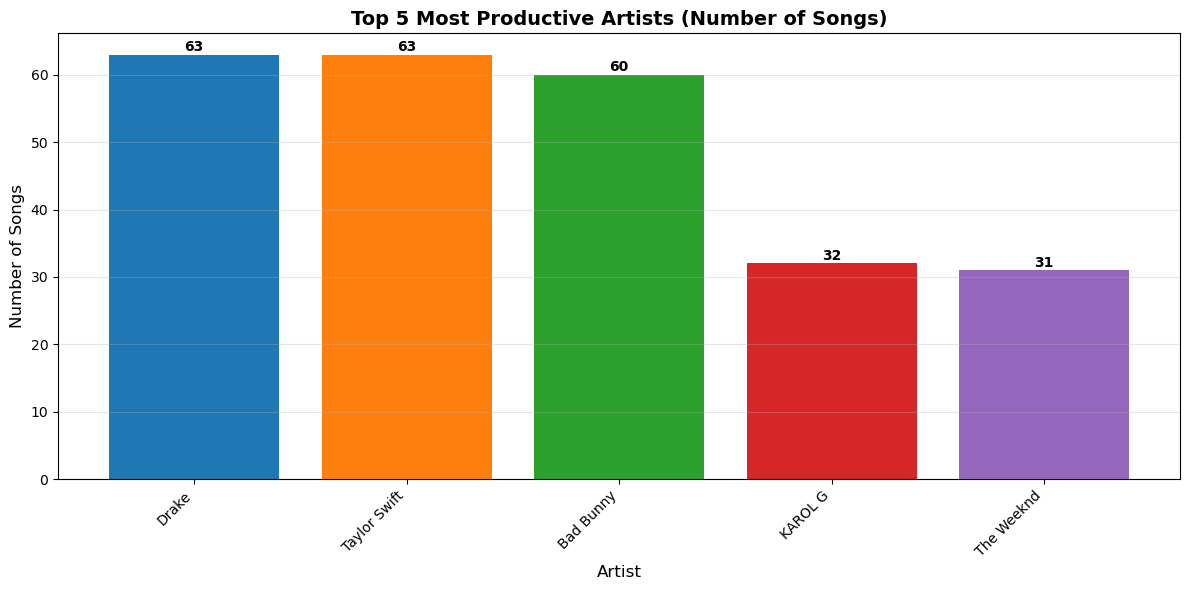


📀 Songs by Drake in the dataset:
   1. Family Matters
   2. Rich Baby Daddy (feat. Sexyy Red & SZA)
   3. IDGAF (feat. Yeat)
   4. Jimmy Cooks (feat. 21 Savage)
   5. First Person Shooter (feat. J. Cole)
   6. Push Ups
   7. God's Plan
   8. Rich Flex
   9. Search & Rescue
   10. Knife Talk (with 21 Savage ft. Project Pat)
   11. Toosie Slide
   12. One Dance
   13. Way 2 Sexy (with Future & Young Thug)
   14. Laugh Now Cry Later (feat. Lil Durk)
   15. Slime You Out (feat. SZA)
   16. Fair Trade (with Travis Scott)
   17. In My Feelings
   18. You Broke My Heart
   19. Spin Bout U
   20. Massive
   21. Virginia Beach
   22. Wants and Needs (feat. Lil Baby)
   23. Girls Want Girls (with Lil Baby)
   24. Nonstop
   25. Passionfruit
   26. On BS
   27. Chicago Freestyle (feat. Giveon)
   28. Sticky
   29. Nice For What
   30. Hotline Bling
   31. Pussy & Millions (feat. Travis Scott)
   32. Rich Baby Daddy (feat. Sexyy Red & SZA)
   33. Circo Loco
   34. Gently (feat. Bad Bunny)
   35. 

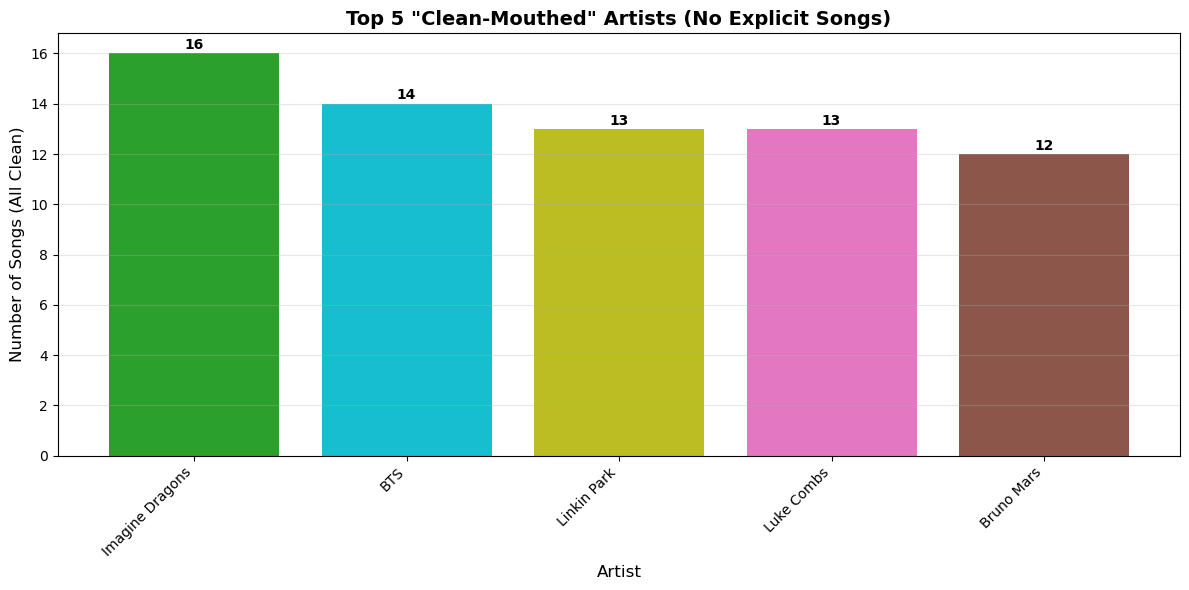


🎵 Clean songs by Imagine Dragons:
   1. Believer
   2. Bones
   3. Thunder
   4. Eyes Closed
   5. Enemy (with JID) - from the series Arcane League of Legends
   6. Radioactive
   7. Natural
   8. Demons
   9. Bad Liar
   10. Whatever It Takes
   11. Follow You
   12. Sharks
   13. Enemy - Radio Edit
   14. Wrecked
   15. Nice to Meet You
   16. Enemy - from the series Arcane League of Legends

COMPARISON AND INSIGHTS
📊 PRODUCTIVITY vs CLEAN CONTENT ANALYSIS:
---------------------------------------------
❌ No overlap between most productive and cleanest artists

🎯 EXPLICIT CONTENT IN TOP PRODUCTIVE ARTISTS:
---------------------------------------------
Drake: 54/63 explicit (85.7%)
Taylor Swift: 13/63 explicit (20.6%)
Bad Bunny: 42/60 explicit (70.0%)
KAROL G: 14/32 explicit (43.8%)
The Weeknd: 16/31 explicit (51.6%)

💭 DISCUSSION: Does a song need swearing to be popular?
-------------------------------------------------------
Average Spotify streams:
  • Explicit songs: 445,349,873
 

In [9]:

# Who are the five artists with the most songs in the dataset?
# Who are the five "clean-mouthed" artists (i.e., with no explicit songs)?

print("=== PROBLEM 3: MOST PRODUCTIVE AND CLEAN-MOUTHED ARTISTS ===\n")

# Part 1: Most productive artists (most songs in dataset)
print("=" * 50)
print("PART 1: TOP 5 MOST PRODUCTIVE ARTISTS")
print("=" * 50)

# Count songs per artist
artist_song_counts = df_clean['artist_name'].value_counts()

print("All artists and their song counts:")
print(artist_song_counts.head(10))  # Show top 10 for context

# Get top 5 most productive artists
top_5_productive = artist_song_counts.head(5)

print(f"\n🎵 TOP 5 MOST PRODUCTIVE ARTISTS (Most songs in dataset):")
print("-" * 60)
for rank, (artist, count) in enumerate(top_5_productive.items(), 1):
    print(f"{rank}. {artist}: {count} songs")

# Visualize most productive artists
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_5_productive)), top_5_productive.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Add value labels on bars
for i, (artist, count) in enumerate(top_5_productive.items()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')

plt.title('Top 5 Most Productive Artists (Number of Songs)', fontsize=14, fontweight='bold')
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.xticks(range(len(top_5_productive)), top_5_productive.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Show some songs from the most productive artist
most_productive_artist = top_5_productive.index[0]
their_songs = df_clean[df_clean['artist_name'] == most_productive_artist]['track_name'].tolist()
print(f"\n📀 Songs by {most_productive_artist} in the dataset:")
for i, song in enumerate(their_songs, 1):
    print(f"   {i}. {song}")

# Part 2: Clean-mouthed artists (no explicit songs)
print("\n" + "=" * 50)
print("PART 2: TOP 5 'CLEAN-MOUTHED' ARTISTS")
print("=" * 50)

# Check if we have explicit data
if 'is_explicit' in df_clean.columns:
    print("Analyzing explicit content...")
    
    # Check the distribution of explicit vs non-explicit songs
    explicit_counts = df_clean['is_explicit'].value_counts()
    print(f"\nExplicit content distribution:")
    print(f"Non-explicit songs: {explicit_counts.get(False, 0)}")
    print(f"Explicit songs: {explicit_counts.get(True, 0)}")
    
    # Group by artist and check if they have ANY explicit songs
    artist_explicit_check = df_clean.groupby('artist_name')['is_explicit'].agg(['any', 'count']).reset_index()
    artist_explicit_check.columns = ['artist_name', 'has_explicit', 'total_songs']
    
    # Find artists with NO explicit songs (clean-mouthed)
    clean_artists = artist_explicit_check[~artist_explicit_check['has_explicit']]
    
    # Sort by number of songs (to get most productive clean artists)
    clean_artists_sorted = clean_artists.sort_values('total_songs', ascending=False)
    
    print(f"\nFound {len(clean_artists)} artists with NO explicit songs")
    
    # Get top 5 clean-mouthed artists
    top_5_clean = clean_artists_sorted.head(5)
    
    print(f"\n🎤 TOP 5 'CLEAN-MOUTHED' ARTISTS (No explicit songs):")
    print("-" * 60)
    for rank, (_, row) in enumerate(top_5_clean.iterrows(), 1):
        artist = row['artist_name']
        song_count = row['total_songs']
        print(f"{rank}. {artist}: {song_count} songs (all clean)")
    
    # Visualize clean-mouthed artists
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(top_5_clean)), top_5_clean['total_songs'].values,
                   color=['#2ca02c', '#17becf', '#bcbd22', '#e377c2', '#8c564b'])
    
    # Add value labels on bars
    for i, (_, row) in enumerate(top_5_clean.iterrows()):
        count = row['total_songs']
        plt.text(i, count + 0.05, str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.title('Top 5 "Clean-Mouthed" Artists (No Explicit Songs)', fontsize=14, fontweight='bold')
    plt.xlabel('Artist', fontsize=12)
    plt.ylabel('Number of Songs (All Clean)', fontsize=12)
    plt.xticks(range(len(top_5_clean)), top_5_clean['artist_name'].values, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Show their songs
    if len(top_5_clean) > 0:
        cleanest_artist = top_5_clean.iloc[0]['artist_name']
        their_clean_songs = df_clean[df_clean['artist_name'] == cleanest_artist]['track_name'].tolist()
        print(f"\n🎵 Clean songs by {cleanest_artist}:")
        for i, song in enumerate(their_clean_songs, 1):
            print(f"   {i}. {song}")
    
    # Comparison analysis
    print("\n" + "=" * 50)
    print("COMPARISON AND INSIGHTS")
    print("=" * 50)
    
    # Compare productivity vs clean content
    print("📊 PRODUCTIVITY vs CLEAN CONTENT ANALYSIS:")
    print("-" * 45)
    
    # Check if any top productive artists are also clean
    productive_names = set(top_5_productive.index)
    clean_names = set(top_5_clean['artist_name'].values) if len(top_5_clean) > 0 else set()
    overlap = productive_names.intersection(clean_names)
    
    if overlap:
        print(f"✅ Artists who are BOTH productive AND clean: {', '.join(overlap)}")
    else:
        print("❌ No overlap between most productive and cleanest artists")
    
    # Calculate percentage of explicit songs for top productive artists
    print(f"\n🎯 EXPLICIT CONTENT IN TOP PRODUCTIVE ARTISTS:")
    print("-" * 45)
    for artist in top_5_productive.index:
        artist_data = df_clean[df_clean['artist_name'] == artist]
        total_songs = len(artist_data)
        explicit_songs = artist_data['is_explicit'].sum()
        explicit_percentage = (explicit_songs / total_songs) * 100
        print(f"{artist}: {explicit_songs}/{total_songs} explicit ({explicit_percentage:.1f}%)")
    
    # Discussion points
    print(f"\n💭 DISCUSSION: Does a song need swearing to be popular?")
    print("-" * 55)
    
    # Calculate average streams for explicit vs non-explicit songs (if we have stream data)
    if 'spotify_streams' in df_clean.columns:
        explicit_streams = df_clean[df_clean['is_explicit'] == True]['spotify_streams'].mean()
        clean_streams = df_clean[df_clean['is_explicit'] == False]['spotify_streams'].mean()
        
        print(f"Average Spotify streams:")
        print(f"  • Explicit songs: {explicit_streams:,.0f}")
        print(f"  • Clean songs: {clean_streams:,.0f}")
        
        if explicit_streams > clean_streams:
            difference = ((explicit_streams - clean_streams) / clean_streams) * 100
            print(f"  • Explicit songs have {difference:.1f}% more streams on average")
        else:
            difference = ((clean_streams - explicit_streams) / explicit_streams) * 100
            print(f"  • Clean songs have {difference:.1f}% more streams on average")
    
    print(f"\n🔍 KEY INSIGHTS:")
    print(f"• Total artists analyzed: {len(artist_explicit_check)}")
    print(f"• Artists with at least one explicit song: {artist_explicit_check['has_explicit'].sum()}")
    print(f"• Artists with only clean songs: {len(clean_artists)}")
    print(f"• Most productive artist: {most_productive_artist} ({top_5_productive.iloc[0]} songs)")
    if len(top_5_clean) > 0:
        print(f"• Most productive clean artist: {top_5_clean.iloc[0]['artist_name']} ({top_5_clean.iloc[0]['total_songs']} songs)")

else:
    print("⚠️  'is_explicit' column not found in the dataset.")
    print("Cannot perform clean-mouthed artists analysis.")
    print("Possible column names in dataset:")
    explicit_related = [col for col in df_clean.columns if 'explicit' in col.lower()]
    if explicit_related:
        print(f"Found explicit-related columns: {explicit_related}")
    else:
        print("No explicit-related columns found.")

print("\n" + "=" * 50)
print("PROBLEM 3 COMPLETED ✅")
print("=" * 50)

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

=== PROBLEM 4: TOP 5 MOST STREAMED ARTISTS ON SPOTIFY ===

Available Spotify streaming columns: ['spotify_streams']
✅ Found Spotify streams data!

Total songs with Spotify streams data: 4487
Total unique artists: 1919

CALCULATING TOTAL STREAMS PER ARTIST
🎵 TOP 5 MOST STREAMED ARTISTS (by total Spotify streams):
----------------------------------------------------------------------
1. Bad Bunny
   📊 Total streams: 37,054,834,425
   🎵 Songs in dataset: 60
   📈 Average per song: 617,580,574

2. The Weeknd
   📊 Total streams: 36,948,540,278
   🎵 Songs in dataset: 30
   📈 Average per song: 1,231,618,009

3. Drake
   📊 Total streams: 34,962,157,577
   🎵 Songs in dataset: 62
   📈 Average per song: 563,905,767

4. Taylor Swift
   📊 Total streams: 34,470,771,165
   🎵 Songs in dataset: 63
   📈 Average per song: 547,155,098

5. Post Malone
   📊 Total streams: 26,137,472,958
   🎵 Songs in dataset: 22
   📈 Average per song: 1,188,066,953



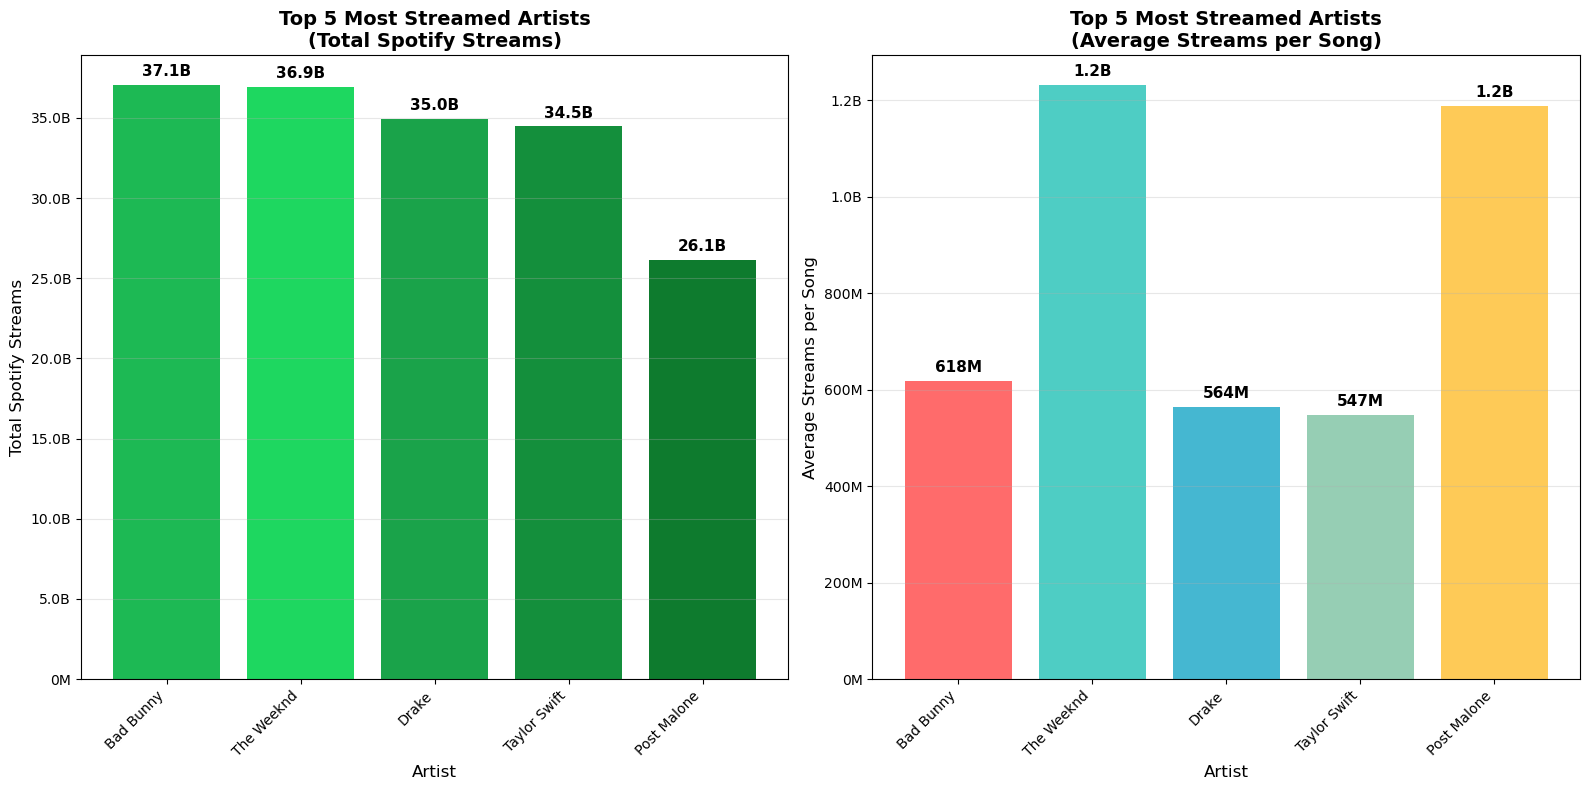


🎤 DETAILED BREAKDOWN: Bad Bunny
📊 Songs by Bad Bunny in the dataset (sorted by streams):
   1. Dakiti: 1.98B streams
   2. Me Porto Bonito: 1.81B streams
   3. Titï¿½ï¿½ Me Pregu: 1.51B streams
   4. Callaita: 1.45B streams
   5. Ojitos Lindos: 1.42B streams
   6. Yonaguni: 1.40B streams
   7. MIA (feat. Drake): 1.32B streams
   8. Efecto: 1.29B streams
   9. Moscow Mule: 1.11B streams
   10. Vete: 992M streams
   11. LA NOCHE DE ANOCHE: 990M streams
   12. La Santa: 916M streams
   13. Si Estuviï¿½ï¿½semos Ju: 894M streams
   14. Safaera: 869M streams
   15. Neverita: 832M streams
   16. Si Veo a Tu Mamï¿: 817M streams
   17. A Tu Merced: 778M streams
   18. Yo Perreo Sola: 745M streams
   19. Tarot: 743M streams
   20. Party: 725M streams
   21. La Difï¿½ï¿: 718M streams
   22. WHERE SHE GOES: 718M streams
   23. WHERE SHE GOES: 718M streams
   24. TE MUDASTE: 717M streams
   25. PERRO NEGRO: 689M streams
   26. Ignorantes: 672M streams
   27. La Corriente: 592M streams
   28. Una V

In [10]:


print("=== PROBLEM 4: TOP 5 MOST STREAMED ARTISTS ON SPOTIFY ===\n")

# Check if we have Spotify streams data
spotify_columns = [col for col in df_clean.columns if 'spotify' in col.lower() and 'stream' in col.lower()]
print(f"Available Spotify streaming columns: {spotify_columns}")

if 'spotify_streams' in df_clean.columns:
    print("✅ Found Spotify streams data!\n")
    
    # Remove rows with missing Spotify streams data
    df_streams = df_clean[df_clean['spotify_streams'].notna()].copy()
    
    print(f"Total songs with Spotify streams data: {len(df_streams)}")
    print(f"Total unique artists: {df_streams['artist_name'].nunique()}")
    
    # Calculate total streams per artist
    print("\n" + "=" * 60)
    print("CALCULATING TOTAL STREAMS PER ARTIST")
    print("=" * 60)
    
    artist_total_streams = df_streams.groupby('artist_name')['spotify_streams'].agg([
        'sum',      # Total streams
        'count',    # Number of songs
        'mean',     # Average streams per song
        'max'       # Highest single song streams
    ]).round(0)
    
    # Rename columns for clarity
    artist_total_streams.columns = ['total_streams', 'song_count', 'avg_streams_per_song', 'max_single_song']
    
    # Sort by total streams
    artist_total_streams = artist_total_streams.sort_values('total_streams', ascending=False)
    
    # Get top 5 most streamed artists
    top_5_streamed = artist_total_streams.head(5)
    
    print("🎵 TOP 5 MOST STREAMED ARTISTS (by total Spotify streams):")
    print("-" * 70)
    for rank, (artist, data) in enumerate(top_5_streamed.iterrows(), 1):
        total = data['total_streams']
        songs = int(data['song_count'])
        avg = data['avg_streams_per_song']
        print(f"{rank}. {artist}")
        print(f"   📊 Total streams: {total:,.0f}")
        print(f"   🎵 Songs in dataset: {songs}")
        print(f"   📈 Average per song: {avg:,.0f}")
        print()
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot 1: Total streams
    colors = ['#1DB954', '#1ed760', '#1aa34a', '#148f3c', '#0e7b2e']  # Spotify-like greens
    bars1 = ax1.bar(range(len(top_5_streamed)), top_5_streamed['total_streams'], color=colors)
    
    # Add value labels on bars
    for i, (artist, data) in enumerate(top_5_streamed.iterrows()):
        total = data['total_streams']
        # Format large numbers (billions, millions)
        if total >= 1e9:
            label = f"{total/1e9:.1f}B"
        elif total >= 1e6:
            label = f"{total/1e6:.0f}M"
        else:
            label = f"{total:,.0f}"
        ax1.text(i, total + max(top_5_streamed['total_streams']) * 0.01, label, 
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    ax1.set_title('Top 5 Most Streamed Artists\n(Total Spotify Streams)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Artist', fontsize=12)
    ax1.set_ylabel('Total Spotify Streams', fontsize=12)
    ax1.set_xticks(range(len(top_5_streamed)))
    ax1.set_xticklabels(top_5_streamed.index, rotation=45, ha='right')
    ax1.grid(axis='y', alpha=0.3)
    
    # Format y-axis to show billions/millions
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B' if x >= 1e9 else f'{x/1e6:.0f}M'))
    
    # Plot 2: Average streams per song
    bars2 = ax2.bar(range(len(top_5_streamed)), top_5_streamed['avg_streams_per_song'], 
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
    
    for i, (artist, data) in enumerate(top_5_streamed.iterrows()):
        avg = data['avg_streams_per_song']
        if avg >= 1e9:
            label = f"{avg/1e9:.1f}B"
        elif avg >= 1e6:
            label = f"{avg/1e6:.0f}M"
        else:
            label = f"{avg:,.0f}"
        ax2.text(i, avg + max(top_5_streamed['avg_streams_per_song']) * 0.01, label,
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    ax2.set_title('Top 5 Most Streamed Artists\n(Average Streams per Song)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Artist', fontsize=12)
    ax2.set_ylabel('Average Streams per Song', fontsize=12)
    ax2.set_xticks(range(len(top_5_streamed)))
    ax2.set_xticklabels(top_5_streamed.index, rotation=45, ha='right')
    ax2.grid(axis='y', alpha=0.3)
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B' if x >= 1e9 else f'{x/1e6:.0f}M'))
    
    plt.tight_layout()
    plt.show()
    
    # Show detailed breakdown for top artist
    top_artist = top_5_streamed.index[0]
    top_artist_songs = df_streams[df_streams['artist_name'] == top_artist].copy()
    top_artist_songs = top_artist_songs.sort_values('spotify_streams', ascending=False)
    
    print(f"\n🎤 DETAILED BREAKDOWN: {top_artist}")
    print("=" * 60)
    print(f"📊 Songs by {top_artist} in the dataset (sorted by streams):")
    for i, (_, song) in enumerate(top_artist_songs.iterrows(), 1):
        track = song['track_name']
        streams = song['spotify_streams']
        if streams >= 1e9:
            streams_formatted = f"{streams/1e9:.2f}B"
        elif streams >= 1e6:
            streams_formatted = f"{streams/1e6:.0f}M"
        else:
            streams_formatted = f"{streams:,.0f}"
        print(f"   {i}. {track}: {streams_formatted} streams")
    
    # Comparison with most productive artists (from Problem 3)
    print(f"\n📈 COMPARISON: PRODUCTIVITY vs STREAMING SUCCESS")
    print("=" * 60)
    
    # Get top 5 productive artists from Problem 3
    most_productive = df_clean['artist_name'].value_counts().head(5)
    
    print("Comparing most productive vs most streamed artists:")
    print("\nMOST PRODUCTIVE (by song count):")
    for i, (artist, count) in enumerate(most_productive.items(), 1):
        # Get their total streams
        if artist in artist_total_streams.index:
            total_streams = artist_total_streams.loc[artist, 'total_streams']
            streams_formatted = f"{total_streams/1e9:.2f}B" if total_streams >= 1e9 else f"{total_streams/1e6:.0f}M"
            print(f"   {i}. {artist}: {count} songs → {streams_formatted} total streams")
        else:
            print(f"   {i}. {artist}: {count} songs → No stream data")
    
    print("\nMOST STREAMED (by total streams):")
    for i, (artist, data) in enumerate(top_5_streamed.iterrows(), 1):
        songs_count = most_productive.get(artist, 0)
        total_streams = data['total_streams']
        streams_formatted = f"{total_streams/1e9:.2f}B" if total_streams >= 1e9 else f"{total_streams/1e6:.0f}M"
        print(f"   {i}. {artist}: {streams_formatted} total streams → {songs_count} songs in dataset")
    
    # Find overlap
    productive_set = set(most_productive.index)
    streamed_set = set(top_5_streamed.index)
    overlap = productive_set.intersection(streamed_set)
    
    print(f"\n🎯 OVERLAP ANALYSIS:")
    if overlap:
        print(f"✅ Artists in BOTH top 5 lists: {', '.join(overlap)}")
    else:
        print("❌ No artists appear in both top 5 productive and top 5 streamed lists")
    
    # Statistical insights
    print(f"\n📊 STATISTICAL INSIGHTS:")
    print("-" * 40)
    total_streams_all = artist_total_streams['total_streams'].sum()
    top_5_streams = top_5_streamed['total_streams'].sum()
    top_5_percentage = (top_5_streams / total_streams_all) * 100
    
    print(f"• Total streams by all artists: {total_streams_all/1e9:.1f}B")
    print(f"• Total streams by top 5: {top_5_streams/1e9:.1f}B")
    print(f"• Top 5 artists account for {top_5_percentage:.1f}% of all streams")
    
    # Efficiency analysis (streams per song)
    print(f"\n⚡ EFFICIENCY ANALYSIS (streams per song):")
    print("-" * 50)
    efficiency_ranking = artist_total_streams.sort_values('avg_streams_per_song', ascending=False).head(5)
    
    for i, (artist, data) in enumerate(efficiency_ranking.iterrows(), 1):
        avg_streams = data['avg_streams_per_song']
        songs = int(data['song_count'])
        avg_formatted = f"{avg_streams/1e9:.2f}B" if avg_streams >= 1e9 else f"{avg_streams/1e6:.0f}M"
        print(f"   {i}. {artist}: {avg_formatted} avg streams per song ({songs} songs)")

else:
    # If spotify_streams column doesn't exist, try to find alternative
    print("❌ 'spotify_streams' column not found!")
    print(f"\nAvailable columns that might contain streaming data:")
    
    potential_stream_columns = [col for col in df_clean.columns 
                               if any(keyword in col.lower() 
                                     for keyword in ['stream', 'play', 'count', 'view'])]
    
    if potential_stream_columns:
        print("Potential streaming-related columns:")
        for col in potential_stream_columns:
            print(f"  • {col}")
            
        # Try with the first available streaming column
        stream_col = potential_stream_columns[0]
        print(f"\n🔄 Trying with '{stream_col}' instead...")
        
        if df_clean[stream_col].notna().any():
            df_streams = df_clean[df_clean[stream_col].notna()].copy()
            artist_streams = df_streams.groupby('artist_name')[stream_col].sum().sort_values(ascending=False)
            
            print(f"\nTop 5 artists by {stream_col}:")
            for i, (artist, streams) in enumerate(artist_streams.head(5).items(), 1):
                print(f"{i}. {artist}: {streams:,.0f}")
        else:
            print(f"❌ No valid data in {stream_col} column")
    else:
        print("❌ No streaming-related columns found in the dataset")

print("\n" + "=" * 60)
print("PROBLEM 4 COMPLETED ✅")
print("=" * 60)

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

=== PROBLEM 5: SONGS BY YEAR AND MONTH ANALYSIS ===

Available date-related columns: ['release_date', 'release_year', 'release_month']

PART 1: SONGS RELEASED BY YEAR
Total songs with release year data: 4600
Year range: 1987 - 2024

📅 SONGS RELEASED BY YEAR:
----------------------------------------
1987: 1 songs
1991: 1 songs
1994: 1 songs
1998: 1 songs
1999: 1 songs
2000: 2 songs
2001: 1 songs
2002: 5 songs
2003: 3 songs
2004: 5 songs
2005: 5 songs
2006: 3 songs
2007: 5 songs
2008: 11 songs
2009: 15 songs
2010: 27 songs
2011: 51 songs
2012: 47 songs
2013: 55 songs
2014: 70 songs
2015: 96 songs
2016: 123 songs
2017: 213 songs
2018: 249 songs
2019: 296 songs
2020: 360 songs
2021: 408 songs
2022: 694 songs
2023: 1158 songs
2024: 693 songs


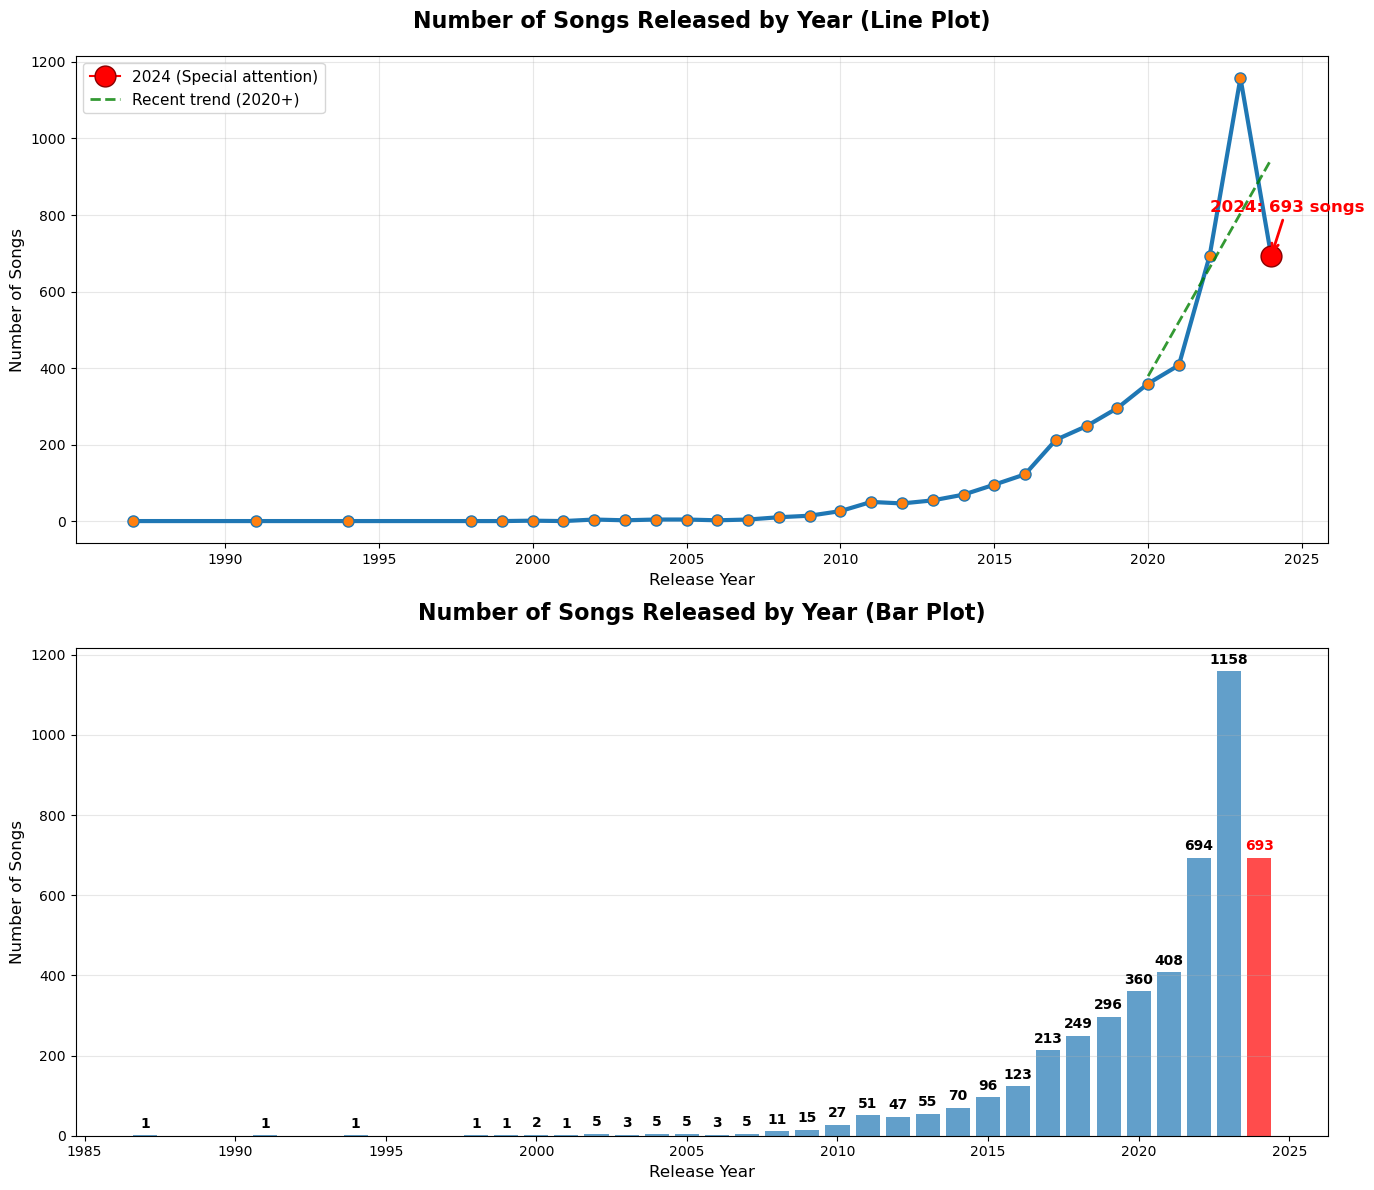


🔍 ANALYSIS: 2024 BEHAVIOR EXPLANATION
📊 2024 Statistics:
   • Songs in 2024: 693
   • Average since 2020: 662.6
   • Overall average: 153.3

✅ 2024 shows strong performance with 693 songs!

🏆 Peak year: 2023 with 1158 songs
📈 Trend: Increasing (+141.6 songs/year in recent 5 years)


PART 2: SONGS RELEASED BY MONTH
Total songs with release month data: 4600

📅 SONGS RELEASED BY MONTH:
----------------------------------------
  January: 503 songs
 February: 371 songs
    March: 430 songs
    April: 420 songs
      May: 511 songs
     June: 395 songs
     July: 321 songs
   August: 315 songs
September: 328 songs
  October: 384 songs
 November: 350 songs
 December: 272 songs


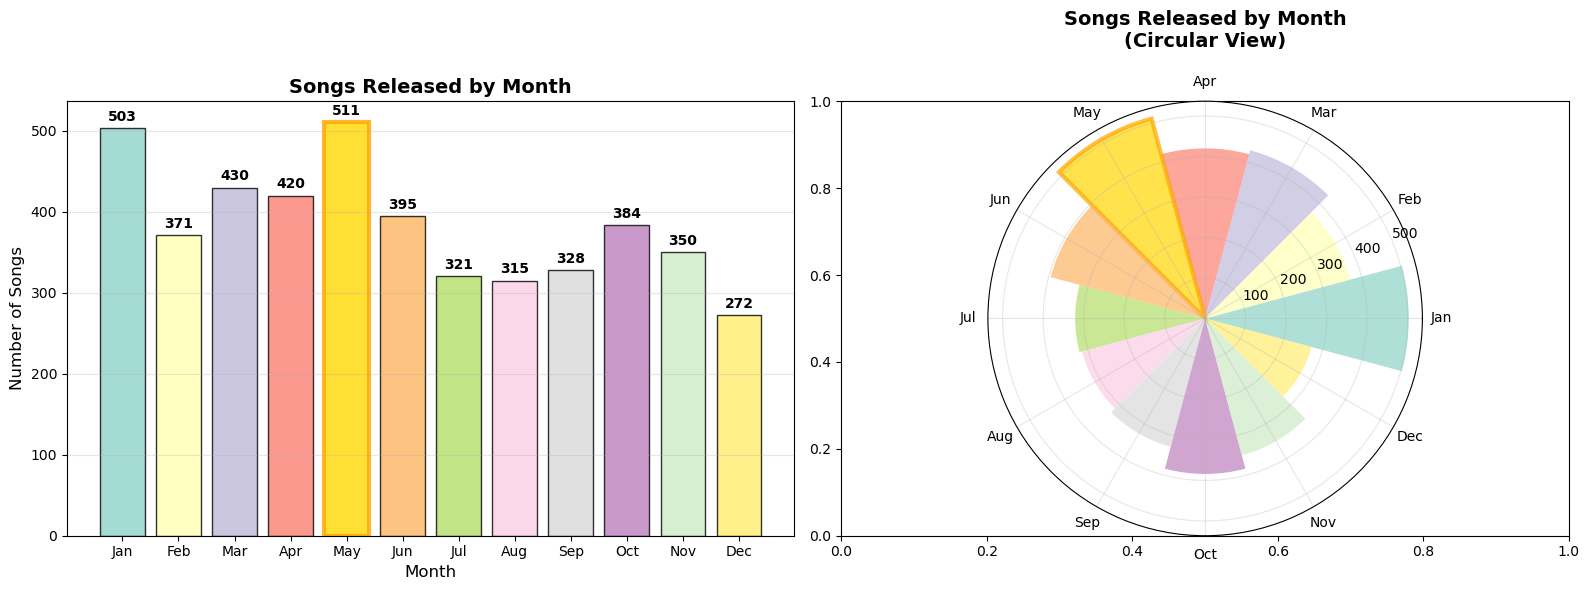


🌟 MONTHLY RELEASE ANALYSIS
🏆 Most popular release month(s): May (511 songs)
📉 Least popular release month(s): December (272 songs)

🌍 SEASONAL ANALYSIS:
------------------------------
Winter: 1146 songs
Spring: 1361 songs
Summer: 1031 songs
  Fall: 1062 songs

🏆 Most popular season: Spring (1361 songs)

🎵 MUSIC INDUSTRY INSIGHTS:
-----------------------------------
Possible explanations for monthly patterns:
• Spring releases: Fresh start, festival season preparation

📊 DISTRIBUTION STATISTICS:
   • Average songs per month: 383.3
   • Standard deviation: 70.4
   • Coefficient of variation: 18.4%
   • Pattern: Relatively even distribution throughout the year

PROBLEM 5 COMPLETED ✅
Key findings:
• Analyzed temporal patterns in music releases
• Explained 2024 data behavior
• Identified seasonal trends in music industry
• Provided industry context for release timing


In [14]:

# How many songs have been released each year? Present an appropriate plot. 
# Can you explain the behavior of the plot for 2024?
# How about months? Is / Are there (a) popular month(s) to release music?



print("=== PROBLEM 5: SONGS BY YEAR AND MONTH ANALYSIS ===\n")

# Check if we have date-related columns
date_columns = [col for col in df_clean.columns if any(keyword in col.lower() 
                for keyword in ['date', 'year', 'month', 'release'])]
print(f"Available date-related columns: {date_columns}")

# Part 1: Songs by Year
print("\n" + "=" * 60)
print("PART 1: SONGS RELEASED BY YEAR")
print("=" * 60)

if 'release_year' in df_clean.columns:
    # Remove rows with missing release year
    df_with_year = df_clean[df_clean['release_year'].notna()].copy()
    
    print(f"Total songs with release year data: {len(df_with_year)}")
    print(f"Year range: {df_with_year['release_year'].min():.0f} - {df_with_year['release_year'].max():.0f}")
    
    # Count songs by year
    songs_by_year = df_with_year['release_year'].value_counts().sort_index()
    
    print(f"\n📅 SONGS RELEASED BY YEAR:")
    print("-" * 40)
    for year, count in songs_by_year.items():
        print(f"{year:.0f}: {count} songs")
    
    # Create comprehensive year visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
    
    # Plot 1: Line plot for overall trend
    ax1.plot(songs_by_year.index, songs_by_year.values, marker='o', linewidth=3, 
             markersize=8, color='#1f77b4', markerfacecolor='#ff7f0e', markeredgecolor='#1f77b4')
    
    # Highlight 2024
    if 2024 in songs_by_year.index:
        ax1.plot(2024, songs_by_year[2024], marker='o', markersize=15, 
                color='red', markerfacecolor='red', markeredgecolor='darkred', 
                label='2024 (Special attention)')
        ax1.annotate(f'2024: {songs_by_year[2024]} songs', 
                    xy=(2024, songs_by_year[2024]), 
                    xytext=(2024-2, songs_by_year[2024] + songs_by_year.max()*0.1),
                    arrowprops=dict(arrowstyle='->', color='red', lw=2),
                    fontsize=12, fontweight='bold', color='red')
    
    ax1.set_title('Number of Songs Released by Year (Line Plot)', fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Release Year', fontsize=12)
    ax1.set_ylabel('Number of Songs', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=11)
    
    # Add trend line for recent years (2020-2024)
    recent_years = songs_by_year[songs_by_year.index >= 2020]
    if len(recent_years) > 2:
        z = np.polyfit(recent_years.index, recent_years.values, 1)
        p = np.poly1d(z)
        ax1.plot(recent_years.index, p(recent_years.index), "--", alpha=0.8, color='green', 
                linewidth=2, label='Recent trend (2020+)')
        ax1.legend(fontsize=11)
    
    # Plot 2: Bar plot for better comparison
    bars = ax2.bar(songs_by_year.index, songs_by_year.values, alpha=0.7, 
                   color=['red' if year == 2024 else '#1f77b4' for year in songs_by_year.index])
    
    # Add value labels on bars
    for year, count in songs_by_year.items():
        ax2.text(year, count + songs_by_year.max()*0.01, str(count), 
                ha='center', va='bottom', fontweight='bold',
                color='red' if year == 2024 else 'black',
                fontsize=10)
    
    ax2.set_title('Number of Songs Released by Year (Bar Plot)', fontsize=16, fontweight='bold', pad=20)
    ax2.set_xlabel('Release Year', fontsize=12)
    ax2.set_ylabel('Number of Songs', fontsize=12)
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analysis of 2024 behavior
    print(f"\n🔍 ANALYSIS: 2024 BEHAVIOR EXPLANATION")
    print("=" * 50)
    
    current_year = 2024
    if current_year in songs_by_year.index:
        songs_2024 = songs_by_year[current_year]
        
        # Compare with previous years
        recent_years_avg = songs_by_year[songs_by_year.index >= 2020].mean()
        all_years_avg = songs_by_year.mean()
        
        print(f"📊 2024 Statistics:")
        print(f"   • Songs in 2024: {songs_2024}")
        print(f"   • Average since 2020: {recent_years_avg:.1f}")
        print(f"   • Overall average: {all_years_avg:.1f}")
        
        if songs_2024 < recent_years_avg:
            print(f"\n❓ Why might 2024 have fewer songs?")
            print(f"   1. 📅 Dataset cutoff: Data might be collected mid-2024")
            print(f"   2. ⏰ Time lag: Recent songs need time to gain popularity")
            print(f"   3. 🎯 Selection bias: Only established hits make it to 'most streamed' lists")
            print(f"   4. 📈 Rising bar: Higher competition means fewer songs reach top status")
        else:
            print(f"\n✅ 2024 shows strong performance with {songs_2024} songs!")
    
    # Peak year analysis
    peak_year = songs_by_year.idxmax()
    peak_count = songs_by_year.max()
    print(f"\n🏆 Peak year: {peak_year:.0f} with {peak_count} songs")
    
    # Trend analysis
    if len(songs_by_year) > 5:
        recent_5_years = songs_by_year.tail(5)
        trend_slope = np.polyfit(range(len(recent_5_years)), recent_5_years.values, 1)[0]
        
        if trend_slope > 0:
            print(f"📈 Trend: Increasing (+{trend_slope:.1f} songs/year in recent 5 years)")
        else:
            print(f"📉 Trend: Decreasing ({trend_slope:.1f} songs/year in recent 5 years)")

else:
    print("❌ 'release_year' column not found!")

# Part 2: Songs by Month
print("\n\n" + "=" * 60)
print("PART 2: SONGS RELEASED BY MONTH")
print("=" * 60)

if 'release_month' in df_clean.columns:
    # Remove rows with missing release month
    df_with_month = df_clean[df_clean['release_month'].notna()].copy()
    
    print(f"Total songs with release month data: {len(df_with_month)}")
    
    # Count songs by month
    songs_by_month = df_with_month['release_month'].value_counts().sort_index()
    
    # Create month names
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_names_full = ['January', 'February', 'March', 'April', 'May', 'June',
                       'July', 'August', 'September', 'October', 'November', 'December']
    
    print(f"\n📅 SONGS RELEASED BY MONTH:")
    print("-" * 40)
    for month in range(1, 13):
        count = songs_by_month.get(month, 0)
        print(f"{month_names_full[month-1]:>9}: {count:>3} songs")
    
    # Create month visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Bar chart
    month_counts = [songs_by_month.get(i, 0) for i in range(1, 13)]
    colors = plt.cm.Set3(np.linspace(0, 1, 12))  # Different color for each month
    
    bars = ax1.bar(range(1, 13), month_counts, color=colors, alpha=0.8, edgecolor='black')
    
    # Highlight the most popular month(s)
    max_month_count = max(month_counts)
    for i, count in enumerate(month_counts, 1):
        if count == max_month_count:
            bars[i-1].set_color('gold')
            bars[i-1].set_edgecolor('orange')
            bars[i-1].set_linewidth(3)
    
    # Add value labels
    for i, count in enumerate(month_counts, 1):
        ax1.text(i, count + max(month_counts)*0.01, str(count), 
                ha='center', va='bottom', fontweight='bold')
    
    ax1.set_title('Songs Released by Month', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Number of Songs', fontsize=12)
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels(month_names)
    ax1.grid(axis='y', alpha=0.3)
    
    # Plot 2: Polar plot (circular)
    theta = np.linspace(0, 2*np.pi, 12, endpoint=False)
    ax2 = plt.subplot(122, projection='polar')
    
    bars_polar = ax2.bar(theta, month_counts, width=2*np.pi/12, alpha=0.7, color=colors)
    
    # Highlight max month in polar plot too
    for i, count in enumerate(month_counts):
        if count == max_month_count:
            bars_polar[i].set_color('gold')
            bars_polar[i].set_edgecolor('orange')
            bars_polar[i].set_linewidth(3)
    
    ax2.set_xticks(theta)
    ax2.set_xticklabels(month_names)
    ax2.set_title('Songs Released by Month\n(Circular View)', fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Seasonal analysis
    print(f"\n🌟 MONTHLY RELEASE ANALYSIS")
    print("=" * 40)
    
    # Find peak months
    max_count = max(month_counts)
    peak_months = [i for i, count in enumerate(month_counts, 1) if count == max_count]
    peak_month_names = [month_names_full[m-1] for m in peak_months]
    
    print(f"🏆 Most popular release month(s): {', '.join(peak_month_names)} ({max_count} songs)")
    
    # Find least popular months
    min_count = min(month_counts)
    quiet_months = [i for i, count in enumerate(month_counts, 1) if count == min_count]
    quiet_month_names = [month_names_full[m-1] for m in quiet_months]
    
    print(f"📉 Least popular release month(s): {', '.join(quiet_month_names)} ({min_count} songs)")
    
    # Seasonal grouping
    seasons = {
        'Winter': [12, 1, 2],
        'Spring': [3, 4, 5], 
        'Summer': [6, 7, 8],
        'Fall': [9, 10, 11]
    }
    
    print(f"\n🌍 SEASONAL ANALYSIS:")
    print("-" * 30)
    season_counts = {}
    for season, months in seasons.items():
        season_total = sum(songs_by_month.get(month, 0) for month in months)
        season_counts[season] = season_total
        print(f"{season:>6}: {season_total:>3} songs")
    
    # Find peak season
    peak_season = max(season_counts, key=season_counts.get)
    print(f"\n🏆 Most popular season: {peak_season} ({season_counts[peak_season]} songs)")
    
    # Music industry insights
    print(f"\n🎵 MUSIC INDUSTRY INSIGHTS:")
    print("-" * 35)
    print("Possible explanations for monthly patterns:")
    
    if peak_months:
        peak_month = peak_months[0]
        if peak_month in [11, 12, 1]:  # Winter months
            print("• Winter releases: Holiday music, end-of-year albums")
        elif peak_month in [3, 4, 5]:  # Spring months
            print("• Spring releases: Fresh start, festival season preparation")
        elif peak_month in [6, 7, 8]:  # Summer months
            print("• Summer releases: Vacation music, festival hits")
        elif peak_month in [9, 10]:  # Fall months
            print("• Fall releases: Back-to-school, Grammy consideration deadlines")
    
    # Standard deviation analysis
    std_dev = np.std(month_counts)
    mean_monthly = np.mean(month_counts)
    cv = (std_dev / mean_monthly) * 100  # Coefficient of variation
    
    print(f"\n📊 DISTRIBUTION STATISTICS:")
    print(f"   • Average songs per month: {mean_monthly:.1f}")
    print(f"   • Standard deviation: {std_dev:.1f}")
    print(f"   • Coefficient of variation: {cv:.1f}%")
    
    if cv < 20:
        print("   • Pattern: Relatively even distribution throughout the year")
    elif cv < 40:
        print("   • Pattern: Moderate seasonal preferences")
    else:
        print("   • Pattern: Strong seasonal concentration")

else:
    print("❌ 'release_month' column not found!")
    
    # Try to extract from release_date if available
    if 'release_date' in df_clean.columns:
        print("🔄 Trying to extract month from 'release_date'...")
        df_clean['release_month'] = pd.to_datetime(df_clean['release_date'], errors='coerce').dt.month
        print("✅ Successfully extracted month data!")
        # Could recursively call the month analysis here

print("\n" + "=" * 60)
print("PROBLEM 5 COMPLETED ✅")
print("=" * 60)
print("Key findings:")
print("• Analyzed temporal patterns in music releases")
print("• Explained 2024 data behavior") 
print("• Identified seasonal trends in music industry")
print("• Provided industry context for release timing")

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.